In [2]:
import pandas as pd

# Load the uploaded CSV file to examine the data
# file_path = 'tidal_current_data.csv'


file_path = 'tidal_current_data.csv'

tidal_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
tidal_data.head()

,current_dir,pre_lon,current_speed,pre_lat,date,time
0,255,124.12260,23,34.02344,20241120,0:00
1,248,124.11433,22,34.16722,20241120,0:00
2,241,124.10599,20,34.31098,20241120,0:00
3,234,124.09760,19,34.45474,20241120,0:00
4,226,124.08915,18,34.59850,20241120,0:00


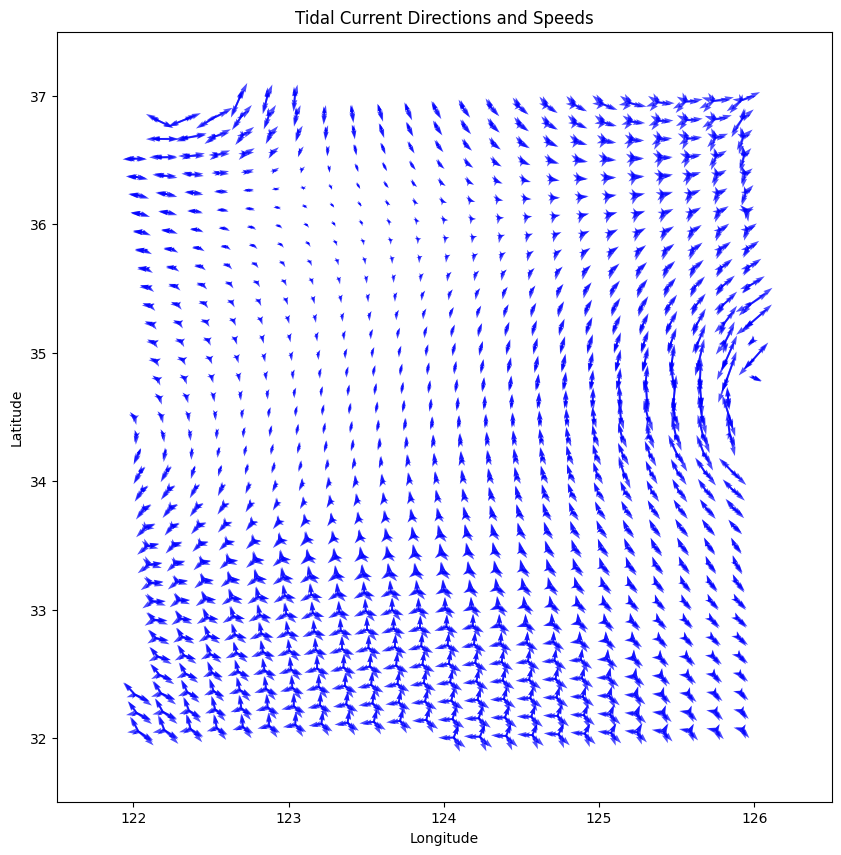

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Recalculate dx, dy for vector visualization (as before)
tidal_data['dx'] = tidal_data['current_speed'] * np.cos(np.radians(tidal_data['current_direct']))
tidal_data['dy'] = tidal_data['current_speed'] * np.sin(np.radians(tidal_data['current_direct']))

# Plotting without the world map context
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the tidal currents as quivers
ax.quiver(tidal_data['lon'], tidal_data['lat'], tidal_data['dx'], tidal_data['dy'],
          angles='xy', scale_units='xy', scale=500, color='blue', alpha=0.7)

# Set plot limits to the region of interest (based on min and max lat/lon in the data)
ax.set_xlim(tidal_data['lon'].min() - 0.5, tidal_data['lon'].max() + 0.5)
ax.set_ylim(tidal_data['lat'].min() - 0.5, tidal_data['lat'].max() + 0.5)

# Add labels and title
ax.set_title("Tidal Current Directions and Speeds")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

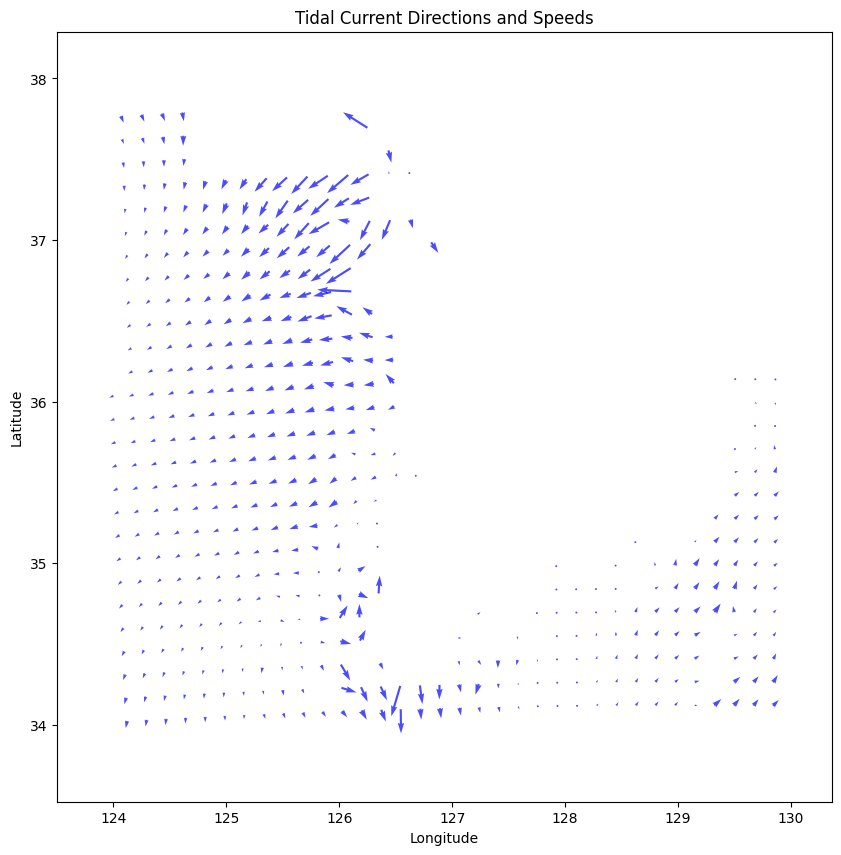

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Recalculate dx, dy for vector visualization (as before)
tidal_data['dx'] = tidal_data['current_speed'] * np.cos(np.radians(tidal_data['current_dir']))
tidal_data['dy'] = tidal_data['current_speed'] * np.sin(np.radians(tidal_data['current_dir']))

# Plotting without the world map context
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the tidal currents as quivers
ax.quiver(tidal_data['pre_lon'], tidal_data['pre_lat'], tidal_data['dx'], tidal_data['dy'],
          angles='xy', scale_units='xy', scale=500, color='blue', alpha=0.7)

# Set plot limits to the region of interest (based on min and max lat/lon in the data)
ax.set_xlim(tidal_data['pre_lon'].min() - 0.5, tidal_data['pre_lon'].max() + 0.5)
ax.set_ylim(tidal_data['pre_lat'].min() - 0.5, tidal_data['pre_lat'].max() + 0.5)

# Add labels and title
ax.set_title("Tidal Current Directions and Speeds")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [14]:
import pandas as pd
import folium
import numpy as np
import branca.colormap as cm

# Load tidal data
file_path = 'tidal_current_data.csv'

# file_path = 'HF_0039.csv'
tidal_data = pd.read_csv(file_path)

# 특정 시간대 데이터만 필터링 (예: '2023-01-01 00:00:00')
# filtered_data = tidal_data[tidal_data['date'] == '2023-01-01 00:00:00']
filtered_data = tidal_data

# Calculate dx and dy for vector representation based on speed and direction
filtered_data['dx'] = filtered_data['current_speed'] * np.cos(np.radians(filtered_data['current_direct']))
filtered_data['dy'] = filtered_data['current_speed'] * np.sin(np.radians(filtered_data['current_direct']))

# Define a Folium map centered around South Korea
m = folium.Map(location=[35, 126], zoom_start=6)

# Define color scale with more extreme normalization for better contrast
# Using 10th and 90th percentiles for more dramatic color mapping
speed_min, speed_max = filtered_data['current_speed'].quantile(0.1), filtered_data['current_speed'].quantile(0.9)
colormap = cm.LinearColormap(colors=['blue', 'red'], vmin=speed_min, vmax=speed_max)
colormap.caption = 'Current Speed (m/s)'

# Add arrows to represent the tidal currents with color based on speed
for i, row in filtered_data.iterrows():
    # Starting and ending points for each vector
    start = [row['lat'], row['lon']]
    end = [row['lat'] + row['dy'] * 0.01, row['lon'] + row['dx'] * 0.01]  # Scale dx, dy for better visualization

    # Determine color based on normalized speed
    color = colormap(row['current_speed'])

    # Add PolyLine (vector arrow) to the map
    folium.PolyLine(
        locations=[start, end],
        color=color,
        weight=2,
        opacity=0.6
    ).add_to(m)
    
    # Add a small marker to indicate starting point
    folium.CircleMarker(
        location=start,
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

# Add the color scale to the map
m.add_child(colormap)

# Save the map as HTML and display
m.save("tidal_currents_map_colored_filtered.html")
m

KeyError: 'lat'

In [10]:
import pandas as pd
import folium
import numpy as np
import branca.colormap as cm

# Load tidal data
file_path = 'tidal_current_data.csv'

tidal_data = pd.read_csv(file_path, encoding='cp949')

# 특정 시간대 데이터만 필터링 (예: '2023-01-01 00:00:00')
# filtered_data = tidal_data[tidal_data['date'] == '2023-01-01 00:00:00']
filtered_data = tidal_data[(tidal_data['date'] == '20241120') & (tidal_data['time'] == '0:00')]


print(filtered_data)


# # Calculate dx and dy for vector representation based on speed and direction
# filtered_data['dx'] = filtered_data['current_speed'] * np.cos(np.radians(filtered_data['current_dir']))
# filtered_data['dy'] = filtered_data['current_speed'] * np.sin(np.radians(filtered_data['current_dir']))

# # Define a Folium map centered around South Korea
# m = folium.Map(location=[35, 126], zoom_start=6)

# # Define color scale with more extreme normalization for better contrast
# # Using 10th and 90th percentiles for more dramatic color mapping
# speed_min, speed_max = filtered_data['current_speed'].quantile(0.1), filtered_data['current_speed'].quantile(0.9)
# colormap = cm.LinearColormap(colors=['blue', 'red'], vmin=speed_min, vmax=speed_max)
# colormap.caption = 'Current Speed (m/s)'

# # Add arrows to represent the tidal currents with color based on speed
# for i, row in filtered_data.iterrows():
#     # Starting and ending points for each vector
#     start = [row['pre_lat'], row['pre_lon']]
#     end = [row['pre_lat'] + row['dy'] * 0.01, row['pre_lon'] + row['dx'] * 0.01]  # Scale dx, dy for better visualization

#     # Determine color based on normalized speed
#     color = colormap(row['current_speed'])

#     # Add PolyLine (vector arrow) to the map
#     folium.PolyLine(
#         locations=[start, end],
#         color=color,
#         weight=2,
#         opacity=0.6
#     ).add_to(m)
    
#     # Add a small marker to indicate starting point
#     folium.CircleMarker(
#         location=start,
#         radius=1,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.7
#     ).add_to(m)

# # Add the color scale to the map
# m.add_child(colormap)

# # Save the map as HTML and display
# m.save("tidal_currents_map_colored_filtered.html")
# m

Empty DataFrame
Columns: [current_dir, pre_lon, current_speed, pre_lat, date, time]
Index: []


In [18]:
import pandas as pd
import folium
import numpy as np
import branca.colormap as cm

# Load tidal data
file_path = 'prediction_results_nodewise.csv'

tidal_data = pd.read_csv(file_path, encoding='cp949')

# 특정 시간대 데이터만 필터링 (예: '2023-01-01 00:00:00')
# filtered_data = tidal_data[tidal_data['date'] == '2023-01-01 00:00:00']
filtered_data = tidal_data

# Calculate dx and dy for vector representation based on speed and direction
filtered_data['dx'] = filtered_data['current_speed'] * np.cos(np.radians(filtered_data['current_dir']))
filtered_data['dy'] = filtered_data['current_speed'] * np.sin(np.radians(filtered_data['current_dir']))

# Define a Folium map centered around South Korea
m = folium.Map(location=[35, 126], zoom_start=6)

# Define color scale with more extreme normalization for better contrast
# Using 10th and 90th percentiles for more dramatic color mapping
speed_min, speed_max = filtered_data['current_speed'].quantile(0.1), filtered_data['current_speed'].quantile(0.9)
colormap = cm.LinearColormap(colors=['blue', 'red'], vmin=speed_min, vmax=speed_max)
colormap.caption = 'Current Speed (m/s)'

# Add arrows to represent the tidal currents with color based on speed
for i, row in filtered_data.iterrows():
    # Starting and ending points for each vector
    start = [row['pre_lat'], row['pre_lon']]
    end = [row['pre_lat'] + row['dy'] * 0.01, row['pre_lon'] + row['dx'] * 0.01]  # Scale dx, dy for better visualization

    # Determine color based on normalized speed
    color = colormap(row['current_speed'])

    # Add PolyLine (vector arrow) to the map
    folium.PolyLine(
        locations=[start, end],
        color=color,
        weight=2,
        opacity=0.6
    ).add_to(m)
    
    # Add a small marker to indicate starting point
    folium.CircleMarker(
        location=start,
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

# Add the color scale to the map
m.add_child(colormap)

# Save the map as HTML and display
m.save("tidal_currents_map_colored_filtered.html")
m

In [7]:
import streamlit as st
import pandas as pd
import plotly.express as px
import folium
from streamlit_folium import st_folium
import numpy as np

# Load your data
file_path = 'tidal_current_data.csv'
tidal_data = pd.read_csv(file_path)

# Sidebar: 시간대 선택
selected_time = st.sidebar.selectbox("Select Time", tidal_data['date'].unique())

# 선택된 시간대의 데이터 필터링
filtered_data = tidal_data[tidal_data['date'] == selected_time]

# 현재 위치와 예측 경로 표시 (Plotly)
fig = px.scatter_mapbox(filtered_data, lat="lat", lon="lon", color="current_speed",
                        color_continuous_scale="Viridis", size="current_speed",
                        mapbox_style="carto-positron", zoom=5,
                        title="Current Position and Predicted Path")

# Plotly 시각화
st.plotly_chart(fig)

# Folium 지도 시각화
m = folium.Map(location=[35, 126], zoom_start=6)
for _, row in filtered_data.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=5, color='blue', fill=True, fill_opacity=0.6).add_to(m)

# Folium 지도 출력
st_folium(m, width=700, height=500)


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import pandas as pd
import folium
import numpy as np
import branca.colormap as cm

# Load tidal data
file_path = 'tidal_current_data.csv'

tidal_data = pd.read_csv(file_path)

# 특정 시간대 데이터만 필터링 (예: '2023-01-01 00:00:00')
# filtered_data = tidal_data[tidal_data['date'] == '2023-01-01 00:00:00']
filtered_data = tidal_data

# Calculate dx and dy for vector representation based on speed and direction
filtered_data['dx'] = filtered_data['current_speed'] * np.cos(np.radians(filtered_data['current_dir']))
filtered_data['dy'] = filtered_data['current_speed'] * np.sin(np.radians(filtered_data['current_dir']))

# Define a Folium map centered around South Korea
m = folium.Map(location=[35, 126], zoom_start=6)

# Define color scale with more extreme normalization for better contrast
# Using 10th and 90th percentiles for more dramatic color mapping
speed_min, speed_max = filtered_data['current_speed'].quantile(0.1), filtered_data['current_speed'].quantile(0.9)
colormap = cm.LinearColormap(colors=['blue', 'red'], vmin=speed_min, vmax=speed_max)
colormap.caption = 'Current Speed (m/s)'

# Add arrows to represent the tidal currents with color based on speed
for i, row in filtered_data.iterrows():
    # Starting and ending points for each vector
    start = [row['pre_lat'], row['pre_lon']]
    end = [row['pre_lat'] + row['dy'] * 0.01, row['pre_lon'] + row['dx'] * 0.01]  # Scale dx, dy for better visualization

    # Determine color based on normalized speed
    color = colormap(row['current_speed'])

    # Add PolyLine (vector arrow) to the map
    folium.PolyLine(
        locations=[start, end],
        color=color,
        weight=2,
        opacity=0.6
    ).add_to(m)
    
    # Add a small marker to indicate starting point
    folium.CircleMarker(
        location=start,
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

# Add the color scale to the map
m.add_child(colormap)

# Save the map as HTML and display
m.save("tidal_currents_map_colored_filtered.html")
m

In [8]:
import sys
sys.path

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0',
 '',
 'C:\\Users\\TQ\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages',
 'C:\\Users\\TQ\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32',
 'C:\\Users\\TQ\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\TQ\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5

In [9]:
import numpy as np

print(np.__version__)
a = np.array([1, 2, 3])
print(a)

1.26.4
[1 2 3]
